# B. Programming Exercise (30 points)
Through this assignment, students will become familiar with basic operations using pandas.

**note:**
* You can use pipenv to install all modules you need

In [1]:
import pandas as pd
import math
from pandas.api.types import is_string_dtype
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read 'Pokemon.csv' file.
df = pd.read_csv('Pokemon.csv', delimiter=',', encoding='utf-8')
display(df.head())

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### **Question 1 (10 pts)**

a. How many percentage of legendary Pokemons with an `Attack` value greater than 150? (3 pts)

b. Also, we want to know how many percentage of non-legendary Pokemons with an `Attack` value greater than 150? (3 pts)

c. Describe what you found. (1 pts)

d. With the scatter plot in *lab04.pdf*, find which pokemon is the outlier at the lower right corner. (3 pts)


**note**
* Write your answers in answer sheet.


percentage of legendary Pokémon have an Attack value greater than 150 is  12.307692307692308
percentage of non-legendary Pokémon have an Attack value greater than 150 is 1.3605442176870748


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


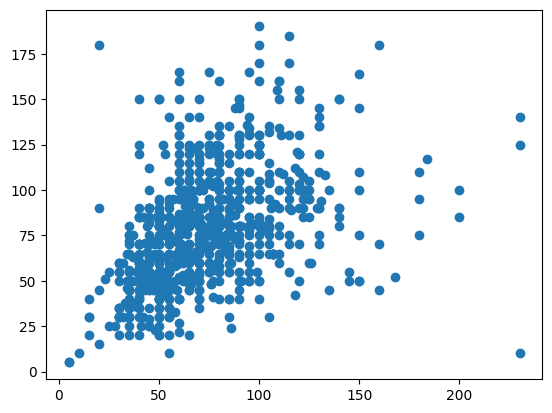

In [4]:
#1
legendary = (df.Legendary == True)
legendary_150 = (df.Legendary == True) & (df.Attack> 150)
percent = (len(df[legendary_150].index)/len(df[legendary].index))*100
print(f"percentage of legendary Pokémon have an Attack value greater than 150 is " , percent)
#2
non_legendary = (df.Legendary == False)
non_legendary_150 = (df.Legendary == False) & (df.Attack >150)
percent2 = (len(df[non_legendary_150].index)/len(df[non_legendary].index))*100
print("percentage of non-legendary Pokémon have an Attack value greater than 150 is" ,percent2)

#4
x = df['Defense']
y = df['Attack']
plt.scatter(x,y)
df.loc[(df['Defense'] > 200) & (df['Attack'] < 25)]

### **Question 2 (10 pts)**
We have a DataFrame about pokemons now. We want to know the distribution of pokemon for each type.

Complete the function ***pokemon_type_count()***


**note:**
* We only consider type1.

In [5]:
def pokemon_type1_count(pokemon):
    """
    compute the number of pokemons for each type1


    Args:
        pokemon (pd.DataFrame) : pokemon dataframe

    Returns:
        Dict[str, int] : dictionary of pokemon types and their counts
    """
    ans = {}
    # TODO_2
    value = pokemon['Type 1']
    ans = value.value_counts().to_dict()
    return ans
pokemon_type1_count(df)

{'Water': 112,
 'Normal': 98,
 'Grass': 70,
 'Bug': 69,
 'Psychic': 57,
 'Fire': 52,
 'Electric': 44,
 'Rock': 44,
 'Dragon': 32,
 'Ground': 32,
 'Ghost': 32,
 'Dark': 31,
 'Poison': 28,
 'Steel': 27,
 'Fighting': 27,
 'Ice': 24,
 'Fairy': 17,
 'Flying': 4}

In [6]:
# This is the assistant's program for review, please do not delete.
def test_pokemon_type(pokemon_dict):
    """
    test the pokemon type dictionary

    Args:
        pokemon_dict (Dict[str, int]) : pokemon type dictionary

    Returns:
        None
    """

    assert isinstance(pokemon_dict, dict), 'pokemon_dict should be a dictionary'
    assert all(isinstance(key, str) for key in pokemon_dict.keys()), 'pokemon_dict keys should be strings'
    assert all(isinstance(value, int) for value in pokemon_dict.values()), 'pokemon_dict values should be integers'
    assert all(value > 0 for value in pokemon_dict.values()), 'pokemon_dict values should be positive integers'
    assert pokemon_dict['Water'] == 112, 'pokemon_dict should have 112 water pokemon'
    assert pokemon_dict['Normal'] == 98, 'pokemon_dict should have 98 normal pokemon'
    assert sum(pokemon_dict.values()) == 800, 'pokemon_dict values should sum to 800'

    print('All tests passed!')


test_pokemon_type(pokemon_type1_count(df))


All tests passed!


## Question 3 (10 pts)

We want to compare the attack value in each generation.

Complete the function `average_attack_type()`, the input should be a pd.DataFrame and output should be a dictionary.


**note**
* If the pokemon has multiple types, you should consider it in both types.

In [7]:
def average_attack_type(pokemon):
    """
    compute the average attack for each type1


    Args:
        pokemon (pd.DataFrame) : pokemon dataframe

    Returns:
        Dict[str, int] : dictionary of pokemon types and their average attack
    """

    ans = {}
    # TODO_3
    aver_atk1 = pokemon.groupby('Type 1' )['Attack'].sum()
    aver_atk2 = pokemon.groupby('Type 2' )['Attack'].sum()
    count1 = pokemon.groupby('Type 1' )['#'].count()
    count2 = pokemon.groupby('Type 2' )['#'].count()

    avg = aver_atk1 + aver_atk2
    cnt_avg = count1 + count2
    a = avg/cnt_avg
    ans = a.to_dict()
    return ans
average_attack_type(df)

{'Bug': 71.76388888888889,
 'Dark': 96.7843137254902,
 'Dragon': 105.76,
 'Electric': 69.52,
 'Fairy': 61.575,
 'Fighting': 104.66037735849056,
 'Fire': 84.109375,
 'Flying': 80.22772277227723,
 'Ghost': 76.93478260869566,
 'Grass': 73.46315789473684,
 'Ground': 92.67164179104478,
 'Ice': 82.05263157894737,
 'Normal': 72.65686274509804,
 'Poison': 70.79032258064517,
 'Psychic': 72.64444444444445,
 'Rock': 90.72413793103448,
 'Steel': 92.65306122448979,
 'Water': 73.7063492063492}

In [8]:
# This is the assistant's program for review, please do not delete.
def test_average_attack_type(average_attack_type):
    """
    test the average attack type dictionary

    Args:
        average_attack_type (Dict[str, int]) : average attack type dictionary

    Returns:
        None
    """
    assert isinstance(average_attack_type, dict), 'average_attack_type should be a dictionary'
    assert all(isinstance(key, str) for key in average_attack_type.keys()), 'average_attack_type keys should be strings'
    assert all(isinstance(value, float) for value in average_attack_type.values()), 'average_attack_type values should be floats'
    assert all(value > 0 for value in average_attack_type.values()), 'average_attack_type values should be positive floats'
    assert np.allclose(average_attack_type['Water'], 73.7063492063492), 'average_attack_type should have 73.7063492063492 water pokemon'
    assert np.allclose(average_attack_type['Grass'], 73.46315789473684), 'average_attack_type should have 73.46315789473684 grass pokemon'

    print('All tests passed!')




test_average_attack_type(average_attack_type(df))

All tests passed!
